In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import xgboost as xgb
from sklearn.linear_model import Lasso
rcParams['figure.figsize'] = 24, 12 

data = pd.read_csv('C:/Users/JP/Documents/School/Practicum/Github/Practicum/data/dataset2.csv')

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.set_index('Date')
df = df[df.index>'2017-05-30']

train=df[df.index<'2017-09-01']
train=train.dropna()

features = ['TBondsOpenValue', 'UnemploymentValue', 'BTCOpenTM1', 'BTCOpenTM2',\
        'BTCOpenTM3', 'BTCOpenTM4', 'BTCOpenTM5', 'BTCOpenTM6', 'BTCOpenTM7','GDP','SandPValue',\
            'ETHOpenTM1', 'ETHOpenTM2',\
        'ETHOpenTM3', 'ETHOpenTM4', 'ETHOpenTM5', 'ETHOpenTM6', 'ETHOpenTM7']
value = ['ETHOpen']

t = np.arange(0.0, 2.0, 0.01)

def lasso_regression(train, predictors, alpha, models_to_plot={}):
    
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(train.loc[:, features].values,train.loc[:, 'ETHOpen'].values)
    y_pred = lassoreg.predict(train.loc[:, features].values)
    
 
    if alpha in models_to_plot:
        #print(models_to_plot[alpha])
        #print(alpha)
        #print(train)
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train.index,y_pred)
        plt.plot(train.index,train.loc[:, 'ETHOpen'].values,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
        plt.show()
    
    #Return the result in pre-defined format
    rss = sum((y_pred-train.loc[:, 'ETHOpen'].values)**2)
    print(rss)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

27849.8294689


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


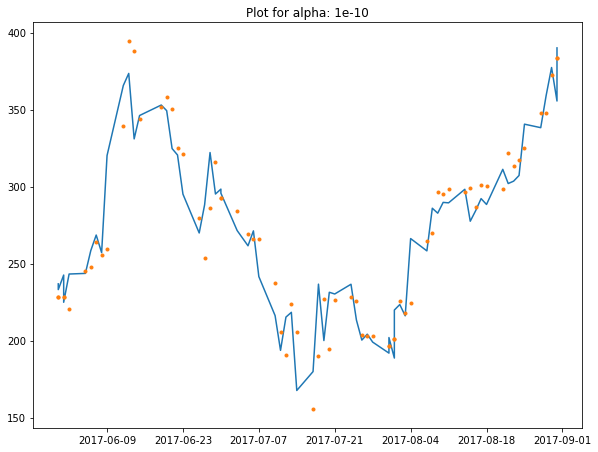

27849.8294689
27849.8294689


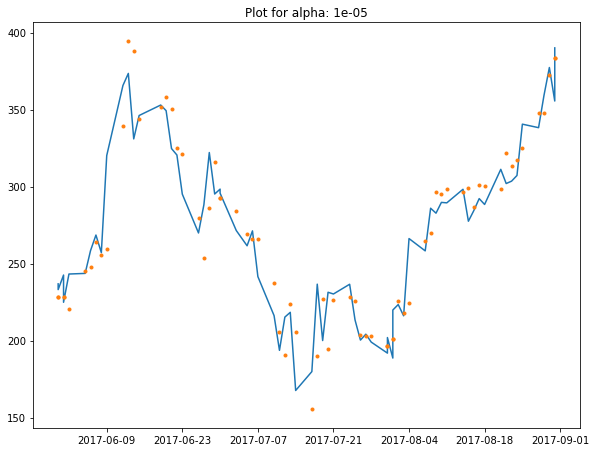

27849.8295508


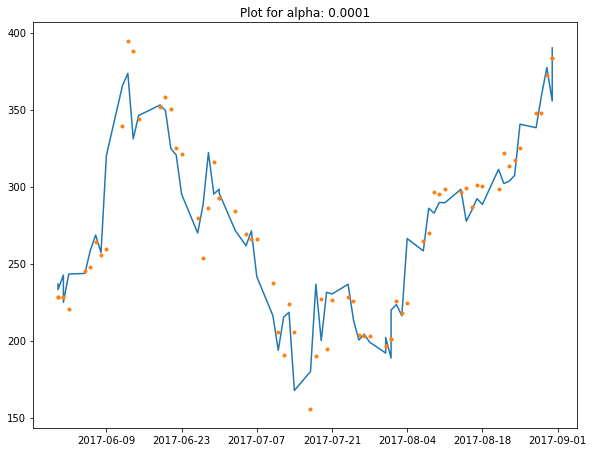

27849.8376017
27850.6663518
27906.8585021


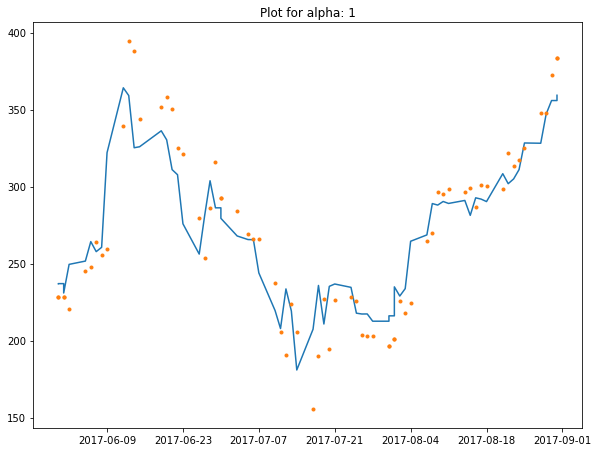

37736.8229847


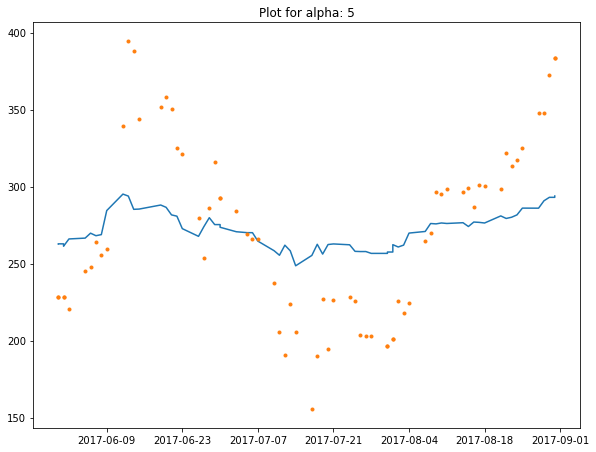

158720.822985


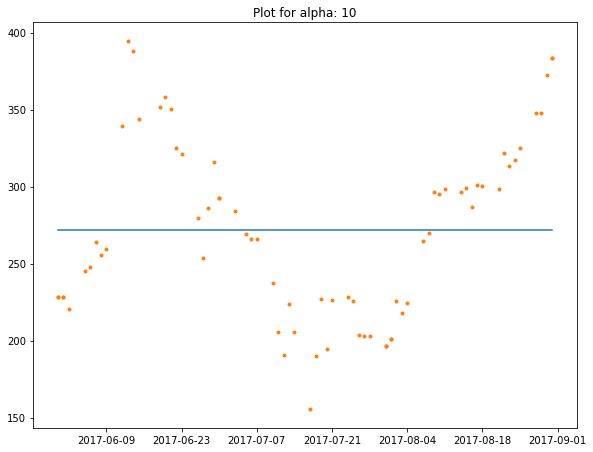

236728.983699


In [93]:
predictors=train.loc[:, features].values
#predictors.extend(['x_%d'%i for i in range(2,20)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + features
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233,1:234,5:235,10:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train,predictors , alpha_lasso[i], models_to_plot)


In [94]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      1
alpha_1e-08      1
alpha_1e-05      3
alpha_0.0001     3
alpha_0.001      3
alpha_0.01       2
alpha_1         16
alpha_5         17
alpha_10        18
dtype: int64

In [95]:
coef_matrix_lasso

,rss,intercept,TBondsOpenValue,UnemploymentValue,BTCOpenTM1,BTCOpenTM2,BTCOpenTM3,BTCOpenTM4,BTCOpenTM5,BTCOpenTM6,BTCOpenTM7,GDP,SandPValue,ETHOpenTM1,ETHOpenTM2,ETHOpenTM3,ETHOpenTM4,ETHOpenTM5,ETHOpenTM6,ETHOpenTM7
alpha_1e-15,27849.8,-1001.99,4.56896,69.4848,0.856702,-0.174868,0.127158,-0.0526895,-0.00544238,-0.0181406,-0.0544053,0.0211034,-0.131743,0.130985,-0.149506,0.129065,-0.0397428,0.010465,-0.00449342,-0.0450438
alpha_1e-10,27849.8,-610.122,4.56896,69.4848,0.856703,-0.174868,0.127158,-0.0526895,-0.00544096,-0.018142,-0.0544053,0,-0.131743,0.130985,-0.149506,0.129065,-0.0397429,0.0104636,-0.00449201,-0.0450438
alpha_1e-08,27849.8,-610.122,4.56896,69.4848,0.856717,-0.174868,0.127159,-0.0526856,-0.00530062,-0.0182815,-0.0544038,0,-0.131743,0.13097,-0.149505,0.129065,-0.0397467,0.0103232,-0.00435257,-0.0450453
alpha_1e-05,27849.8,-610.097,4.56894,69.4752,0.857372,-0.174872,0.127159,-0.052512,0,-0.0226127,-0.0552668,0,-0.131735,0.130294,-0.149453,0.12901,-0.0398636,0.00497933,-0,-0.0441825
alpha_0.0001,27849.8,-609.873,4.56873,69.3895,0.857362,-0.17464,0.126934,-0.0522694,0,-0.0224242,-0.0555379,0,-0.131668,0.130114,-0.149241,0.12874,-0.0395984,0.00459329,-0,-0.0439116
alpha_0.001,27850.7,-607.585,4.56657,68.5225,0.857284,-0.172313,0.124654,-0.0497873,0,-0.0203971,-0.058415,0,-0.130999,0.128282,-0.147111,0.126013,-0.036897,0.000590543,-0,-0.0410947
alpha_0.01,27906.9,-572.318,4.50445,59.0033,0.852061,-0.150205,0.105943,-0.0361333,-0.00468947,-0.0169782,-0.0579113,0,-0.125507,0.114225,-0.127194,0.102715,-0.0199064,-0.00217324,-0,-0.0401637
alpha_1,37736.8,61.9662,0,0,0.765861,0,0,0,0,0,0,0,-0,5.71765e-17,0,0,0,0,0,0
alpha_5,158721,218.426,0,0,0.194534,0,0,0,0,0,0,0,-0,0,0,0,0,0,0,0
alpha_10,236729,271.7,0,0,0,0,0,0,0,0,0,0,-0,0,0,0,0,0,0,0


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import xgboost as xgb
from sklearn.linear_model import Lasso
rcParams['figure.figsize'] = 24, 12 

data = pd.read_csv('C:/Users/JP/Documents/School/Practicum/Github/Practicum/data/dataset3.csv')

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.set_index('Date')
df = df[df.index>'2017-05-30']

train=df[df.index<'2017-09-01']

train=train.dropna()

features = ['TBondsOpenValue', 'UnemploymentValue', 'BTCOpenTM1', 'BTCOpenTM2',\
        'BTCOpenTM3', 'BTCOpenTM4', 'BTCOpenTM5', 'BTCOpenTM6', 'BTCOpenTM7','GDP','SandPValue',\
            'ETHOpenTM1', 'ETHOpenTM2',\
        'ETHOpenTM3', 'ETHOpenTM4', 'ETHOpenTM5', 'ETHOpenTM6', 'ETHOpenTM7']
value = ['ETHOpen']





D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


29505.1712627


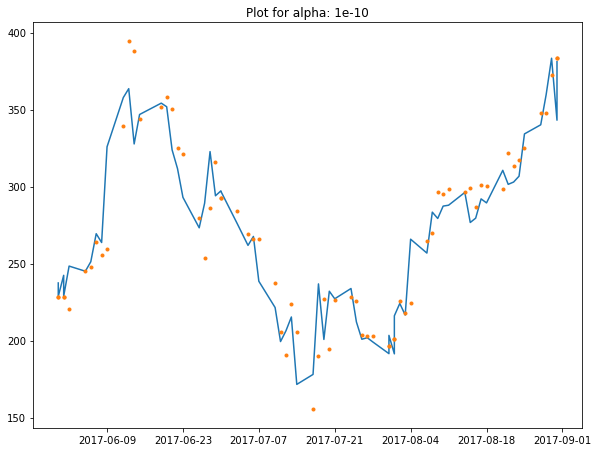

29505.1708796
29505.1360542


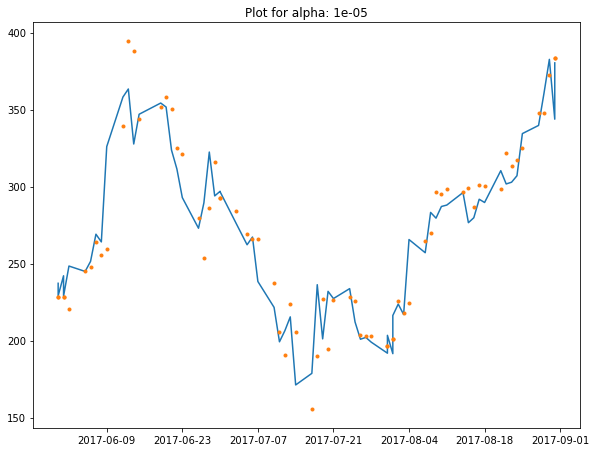

29473.1705046


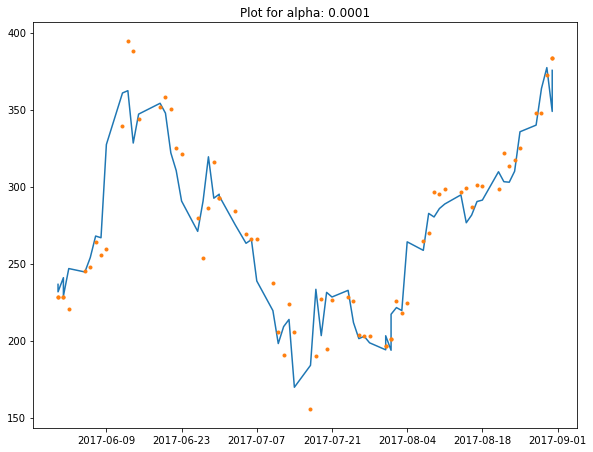

29499.326726
33177.3963839
75097.730187


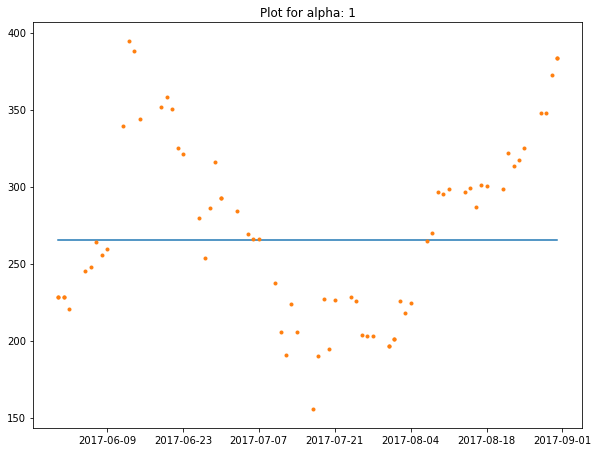

239377.483545


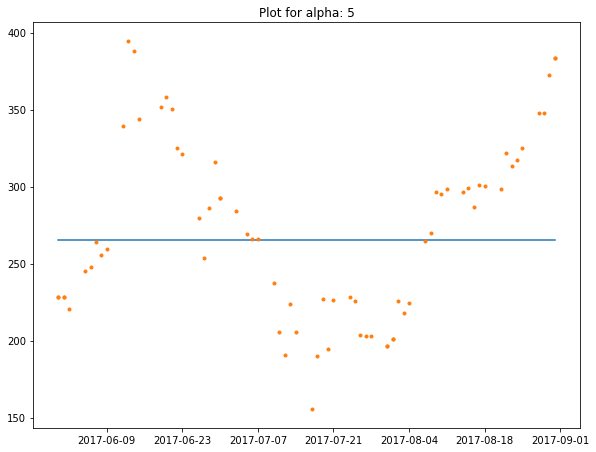

239377.483545


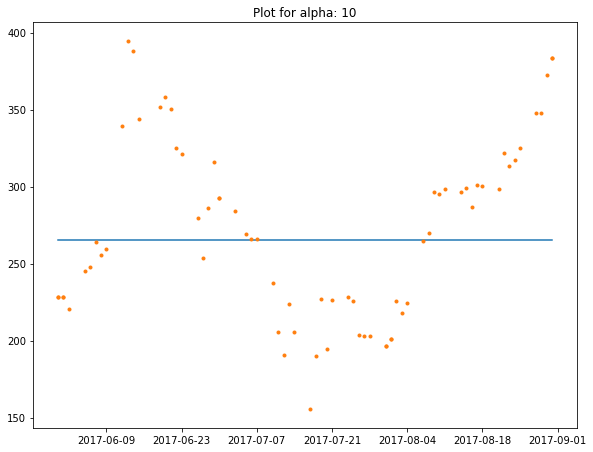

239377.483545


,rss,intercept,TBondsOpenValue,UnemploymentValue,BTCOpenTM1,BTCOpenTM2,BTCOpenTM3,BTCOpenTM4,BTCOpenTM5,BTCOpenTM6,BTCOpenTM7,GDP,SandPValue,ETHOpenTM1,ETHOpenTM2,ETHOpenTM3,ETHOpenTM4,ETHOpenTM5,ETHOpenTM6,ETHOpenTM7
alpha_1e-15,29505.2,-200.989,2.68698,1.37187,0.813669,-0.168665,0.206586,-0.105118,-0.00334466,-0.0468469,-0.0293028,20.3212,-1.61695,0.101318,-0.148754,0.201869,-0.0826435,0.0161535,-0.03691,-0.0241114
alpha_1e-10,29505.2,-1.2467,2.68698,1.37187,0.81371,-0.168668,0.206583,-0.105106,-0.00295845,-0.0472277,-0.0293015,0,-1.61695,0.101277,-0.148751,0.201872,-0.0826552,0.0157672,-0.0365291,-0.0241127
alpha_1e-08,29505.1,-1.2467,2.68698,1.37182,0.814022,-0.168683,0.206555,-0.10501,0,-0.0501459,-0.0292921,-0,-1.61694,0.10096,-0.148723,0.201887,-0.0827379,0.0127975,-0.0336033,-0.0241234
alpha_1e-05,29473.2,-1.24721,2.67977,1.32084,0.813008,-0.161489,0.199826,-0.0973596,0,-0.0521246,-0.0301137,-0,-1.60444,0.0957399,-0.142118,0.193852,-0.0744651,0,-0.0231825,-0.0250942
alpha_0.0001,29499.3,-0.823343,2.54743,0.813297,0.803034,-0.106979,0.152665,-0.0557268,-0.0242993,-0.0297249,-0.0316822,-0,-1.49865,0.05719,-0.0939966,0.140206,-0.0298757,-0.0061265,-0.0211296,-0.0275209
alpha_0.001,33177.4,1.52356,1.3176,0,0.777255,0,0.0358267,0,-0,-0,-0,-0,-0.915352,0.00206503,0,0,0,-0,-0,-0
alpha_0.01,75097.7,2.70331,0,0,0.515043,0,0,0,0,0,0,-0,-0,1.21096e-16,0,0,0,0,0,0
alpha_1,239377,5.58196,0,0,0,0,0,0,0,0,0,0,-0,0,0,0,0,0,0,0
alpha_5,239377,5.58196,0,0,0,0,0,0,0,0,0,0,-0,0,0,0,0,0,0,0
alpha_10,239377,5.58196,0,0,0,0,0,0,0,0,0,0,-0,0,0,0,0,0,0,0


In [136]:
def lasso_regression(train, predictors, alpha, models_to_plot={}):
    
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(train.loc[:, features].values,train.loc[:, 'ETHOpen'].values)
    y_pred = lassoreg.predict(train.loc[:, features].values)
    
 
    if alpha in models_to_plot:
        #print(models_to_plot[alpha])
        #print(alpha)
        #print(train)
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train.index,np.exp(y_pred))
        plt.plot(train.index,np.exp(train.loc[:, 'ETHOpen'].values),'.')
        plt.title('Plot for alpha: %.3g'%alpha)
        plt.show()
    
    #Return the result in pre-defined format
    rss = sum((np.exp(y_pred)-np.exp(train.loc[:, 'ETHOpen'].values))**2)
    print(rss)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

predictors=train.loc[:, features].values
#predictors.extend(['x_%d'%i for i in range(2,20)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + features
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233,1:234,5:235,10:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train,predictors , alpha_lasso[i], models_to_plot)
    

coef_matrix_lasso

In [137]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      1
alpha_1e-08      2
alpha_1e-05      3
alpha_0.0001     1
alpha_0.001     13
alpha_0.01      16
alpha_1         18
alpha_5         18
alpha_10        18
dtype: int64